In [52]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [53]:


df = pd.read_csv("E:\semester 5\Data Analysis\movie_data_analysis\data\movies_project_final_dataset.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\AL LEWAA\AppData\Local\Temp\ipykernel_17172\2400147352.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("E:\semester 5\Data Analysis\movie_data_analysis\data\movies_project_final_dataset.csv")


,Release Date,Title,Budget,Domestic Gross,Worldwide Gross,Year,Rating,Vote Count,Language,Season,original_release_date,Critic_Score,Audience_Score,Title_clean
0,2019-04-23,Avengers: Endgame,400000000.0,858373000.0,2.717504e+09,2019.0,8.237,26987,en,Spring,2019-04-26,94.0,90.0,avengers: endgame
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000.0,241071802.0,1.045714e+09,2011.0,6.563,14607,en,Spring,2011-05-20,33.0,54.0,pirates of the caribbean: on stranger tides
2,2015-04-22,Avengers: Age of Ultron,365000000.0,459005868.0,1.395317e+09,2015.0,7.271,23894,en,Spring,2015-05-01,76.0,83.0,avengers: age of ultron
3,2018-05-23,Solo: A Star Wars Story,330400000.0,213767512.0,3.931513e+08,2018.0,6.559,9020,en,Spring,2018-05-25,70.0,64.0,solo: a star wars story
4,2018-04-25,Avengers: Infinity War,300000000.0,678815482.0,2.048158e+09,2018.0,8.235,31196,en,Spring,2018-04-27,85.0,91.0,avengers: infinity war


In [54]:
print("Dataset shape after preprocessing:", df.shape)
print(df.info())

Dataset shape after preprocessing: (1995, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release Date           1995 non-null   object 
 1   Title                  1995 non-null   object 
 2   Budget                 1995 non-null   float64
 3   Domestic Gross         1995 non-null   float64
 4   Worldwide Gross        1995 non-null   float64
 5   Year                   1995 non-null   float64
 6   Rating                 1995 non-null   float64
 7   Vote Count             1995 non-null   int64  
 8   Language               1995 non-null   object 
 9   Season                 1995 non-null   object 
 10  original_release_date  1995 non-null   object 
 11  Critic_Score           1995 non-null   float64
 12  Audience_Score         1995 non-null   float64
 13  Title_clean            1995 non-null   object 
dtypes: float64

# EDA

In [55]:
print("Dataset shape after preprocessing:", df.shape)
print(df.info())

Dataset shape after preprocessing: (1995, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release Date           1995 non-null   object 
 1   Title                  1995 non-null   object 
 2   Budget                 1995 non-null   float64
 3   Domestic Gross         1995 non-null   float64
 4   Worldwide Gross        1995 non-null   float64
 5   Year                   1995 non-null   float64
 6   Rating                 1995 non-null   float64
 7   Vote Count             1995 non-null   int64  
 8   Language               1995 non-null   object 
 9   Season                 1995 non-null   object 
 10  original_release_date  1995 non-null   object 
 11  Critic_Score           1995 non-null   float64
 12  Audience_Score         1995 non-null   float64
 13  Title_clean            1995 non-null   object 
dtypes: float64

In [56]:
df.describe()

,Budget,Domestic Gross,Worldwide Gross,Year,Rating,Vote Count,Critic_Score,Audience_Score
count,1.995000e+03,1.995000e+03,1.995000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000
mean,5.055072e+07,7.763958e+07,1.752991e+08,2005.159398,6.868691,4734.992481,63.014536,69.459148
std,4.995076e+07,8.957998e+07,2.472383e+08,10.575641,0.533138,5282.152213,23.376498,14.691263
min,5.000000e+06,0.000000e+00,0.000000e+00,1956.000000,6.089000,300.000000,0.000000,31.000000
25%,1.740000e+07,2.400578e+07,3.714139e+07,2000.000000,6.431000,1302.000000,45.500000,58.000000
50%,3.500000e+07,5.008199e+07,8.795093e+07,2007.000000,6.800000,2845.000000,66.000000,70.000000
75%,6.500000e+07,9.886380e+07,2.066132e+08,2013.000000,7.233500,6161.500000,83.000000,82.000000
max,4.000000e+08,8.583730e+08,2.923706e+09,2020.000000,8.713000,38370.000000,100.000000,98.000000


# Top 10 highest grossing movies

In [57]:
top_grossing = df[['Title', 'Year', 'Worldwide Gross']].sort_values(by='Worldwide Gross', ascending=False).head(10)
print(top_grossing)


                       Title    Year  Worldwide Gross
17                    Avatar  2009.0     2.923706e+09
0          Avengers: Endgame  2019.0     2.717504e+09
31                   Titanic  1997.0     2.223049e+09
4     Avengers: Infinity War  2018.0     2.048158e+09
25            Jurassic World  2015.0     1.671064e+09
8              The Lion King  2019.0     1.661454e+09
49                 Furious 7  2015.0     1.510065e+09
112                Frozen II  2019.0     1.451653e+09
2    Avengers: Age of Ultron  2015.0     1.395317e+09
30             Black Panther  2018.0     1.334157e+09


# Distribution of Worldwide Gross by Season

C:\Users\AL LEWAA\AppData\Local\Temp\ipykernel_17172\3777901917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Worldwide Gross', data=df, palette='coolwarm')


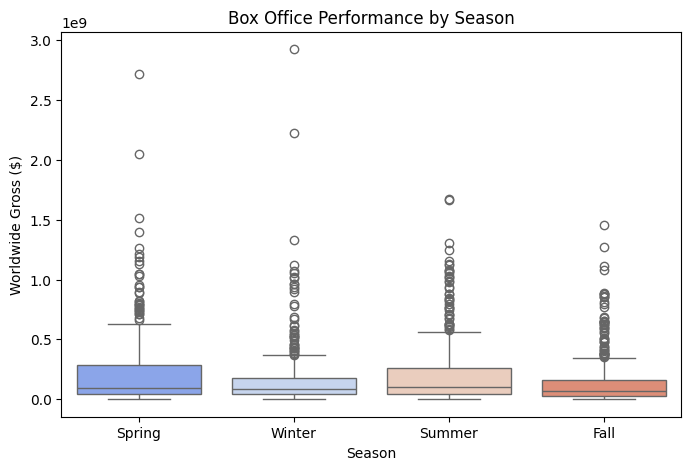

In [58]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Season', y='Worldwide Gross', data=df, palette='coolwarm')
plt.ylabel("Worldwide Gross ($)")
plt.title("Box Office Performance by Season")
plt.show()

# Average Worldwide Gross by Language


--- Top 10 Languages by Average Box Office ---
Language
en    1.759710e+08
fr    7.977819e+07
zh    7.901569e+07
es    4.456484e+07
it    2.400157e+07
de    2.145440e+07
Name: Worldwide Gross, dtype: float64


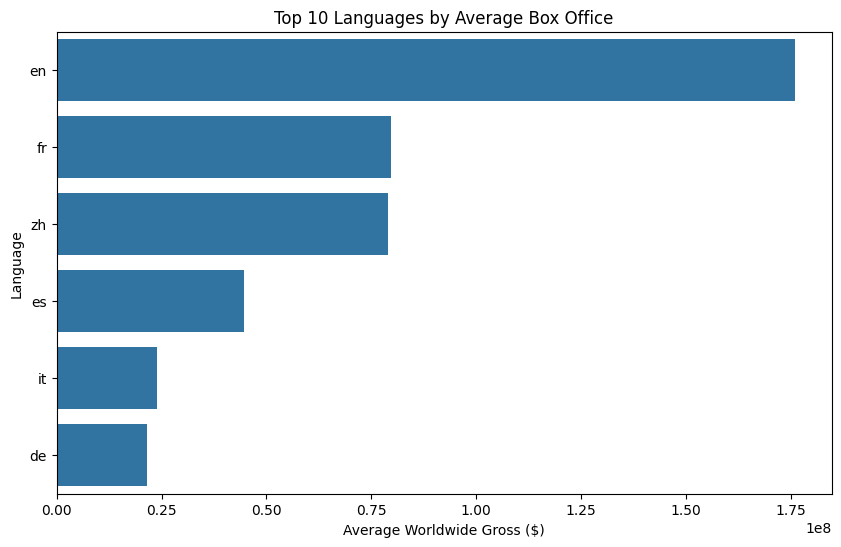

In [59]:

avg_lang_gross = df.groupby('Language')['Worldwide Gross'].mean().sort_values(ascending=False).head(10)
print("\n--- Top 10 Languages by Average Box Office ---")
print(avg_lang_gross)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_lang_gross.values, y=avg_lang_gross.index)
plt.xlabel("Average Worldwide Gross ($)")
plt.ylabel("Language")
plt.title("Top 10 Languages by Average Box Office")
plt.show()

# Seasonality of Movie Releases

C:\Users\AL LEWAA\AppData\Local\Temp\ipykernel_17172\2344865308.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Season', data=df, palette='pastel')


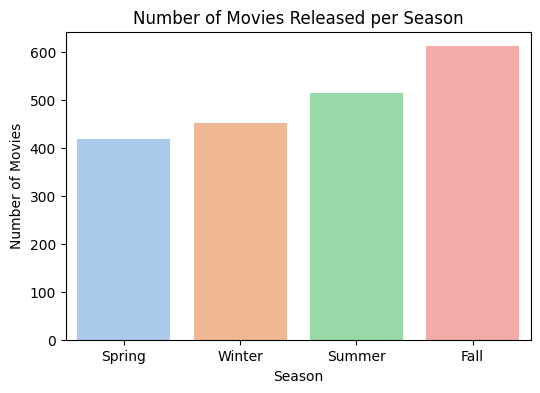

In [60]:
plt.figure(figsize=(6,4))
sns.countplot(x='Season', data=df, palette='pastel')
plt.title("Number of Movies Released per Season")
plt.xlabel("Season")
plt.ylabel("Number of Movies")
plt.show()


# Correlation Heatmap

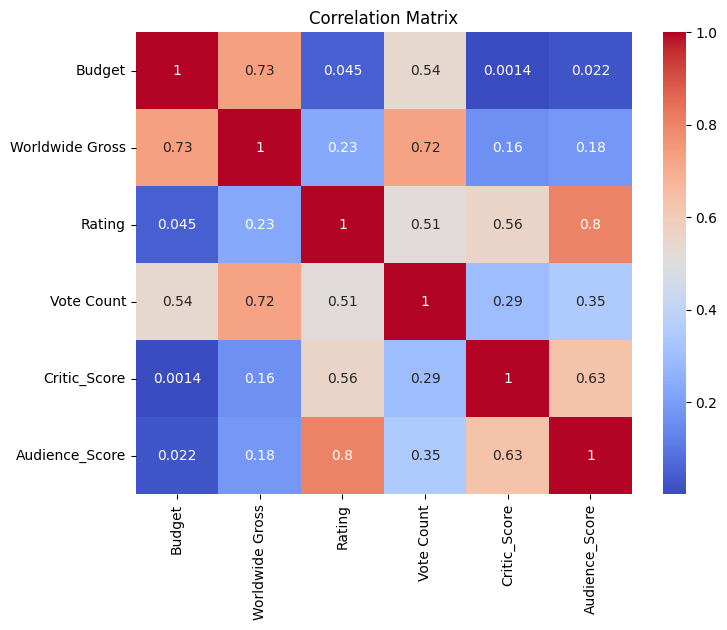

In [61]:
corr = df[['Budget', 'Worldwide Gross', 'Rating', 'Vote Count', 'Critic_Score', 'Audience_Score']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Question 1 What factors most strongly predict box office success â€” budget, cast popularity, or IMDb ratings? 

In [62]:

df['Budget'] = df['Budget'].replace('[\$,]', '', regex=True).astype(float)
df['Worldwide Gross'] = df['Worldwide Gross'].replace('[\$,]', '', regex=True).astype(float)


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\AL LEWAA\AppData\Local\Temp\ipykernel_17172\2378476132.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Budget'] = df['Budget'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\AL LEWAA\AppData\Local\Temp\ipykernel_17172\2378476132.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Worldwide Gross'] = df['Worldwide Gross'].replace('[\$,]', '', regex=True).astype(float)


In [63]:
analysis_df = df[['Budget', 'Worldwide Gross']]

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\AL LEWAA\AppData\Local\Temp\ipykernel_17172\493539238.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Budget'] = df['Budget'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\AL LEWAA\AppData\Local\Temp\ipykernel_17172\493539238.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['Worldwide Gross'] = df['Worldwide Gross'].replace('[\$,]', '', regex=True).astype(float)


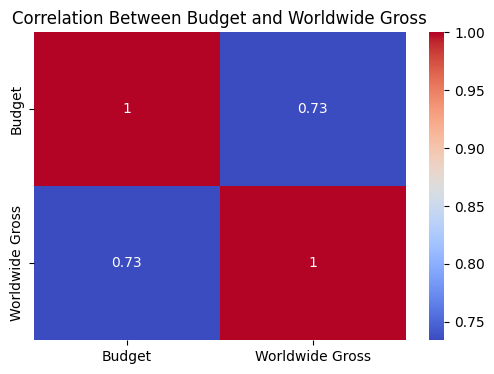

In [64]:
corr = analysis_df.corr()
df['Budget'] = df['Budget'].replace('[\$,]', '', regex=True).astype(float)
df['Worldwide Gross'] = df['Worldwide Gross'].replace('[\$,]', '', regex=True).astype(float)
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Budget and Worldwide Gross')
plt.show()



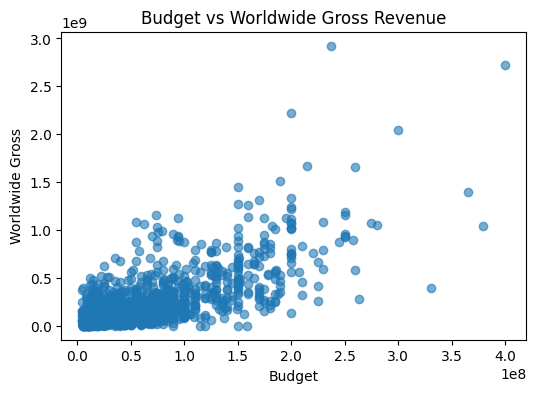

In [65]:
plt.figure(figsize=(6,4))
plt.scatter(df['Budget'], df['Worldwide Gross'], alpha=0.6)
plt.xlabel('Budget')
plt.ylabel('Worldwide Gross')
plt.title('Budget vs Worldwide Gross Revenue')
plt.show()

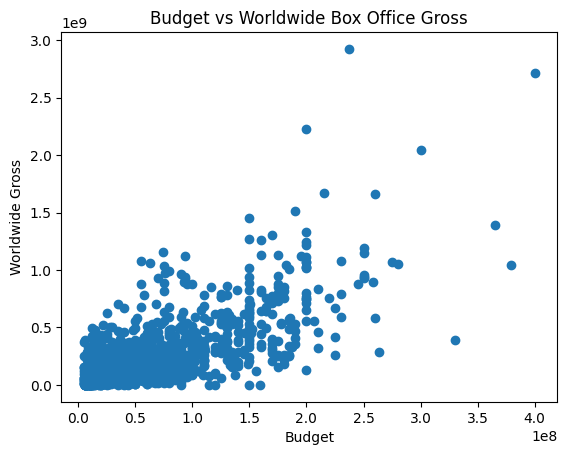

In [66]:
plt.figure()
plt.scatter(df["Budget"], df["Worldwide Gross"])
plt.xlabel("Budget")
plt.ylabel("Worldwide Gross")
plt.title("Budget vs Worldwide Box Office Gross")
plt.show()

c:\Users\AL LEWAA\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


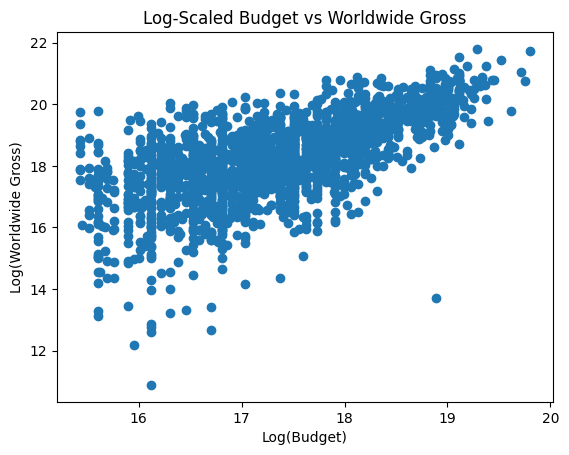

In [67]:
plt.figure()
plt.scatter(
    np.log(df["Budget"]),
    np.log(df["Worldwide Gross"])
)
plt.xlabel("Log(Budget)")
plt.ylabel("Log(Worldwide Gross)")
plt.title("Log-Scaled Budget vs Worldwide Gross")
plt.show()

In [68]:
# Features
X = df["Budget"].values
y = df["Worldwide Gross"].values

# ---- SIMPLE LINEAR REGRESSION ----
# y = m*x + b
m, b = np.polyfit(X, y, 1)

# Predictions
x_line = np.linspace(X.min(), X.max(), 300)
y_line = m * x_line + b

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

Slope (m): 3.633093212626522
Intercept (b): -8356331.738100461


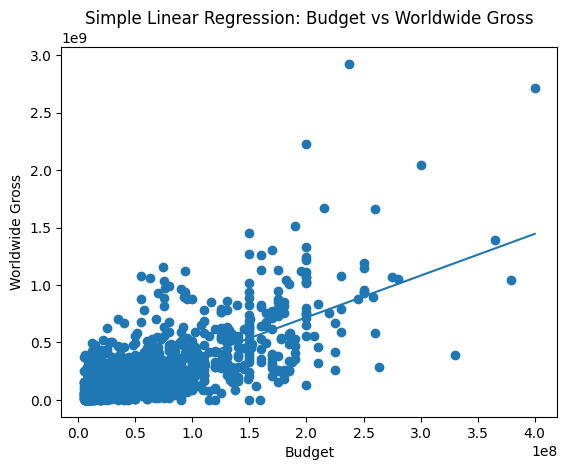

In [69]:
#PLOT 
plt.figure()
plt.scatter(X, y)
plt.plot(x_line, y_line)
plt.xlabel("Budget")
plt.ylabel("Worldwide Gross")
plt.title("Simple Linear Regression: Budget vs Worldwide Gross")
plt.show()

In [70]:
test_budgets = np.array([
    10_000_000,
    30_000_000,
    50_000_000,
    100_000_000,
    200_000_000
])

# Predictions
predicted_gross = m * test_budgets + b

# Show results
for budget, gross in zip(test_budgets, predicted_gross):
    print(f"Budget: ${budget:,.0f} → Predicted Gross: ${gross:,.0f}")

Budget: $10,000,000 → Predicted Gross: $27,974,600
Budget: $30,000,000 → Predicted Gross: $100,636,465
Budget: $50,000,000 → Predicted Gross: $173,298,329
Budget: $100,000,000 → Predicted Gross: $354,952,990
Budget: $200,000,000 → Predicted Gross: $718,262,311


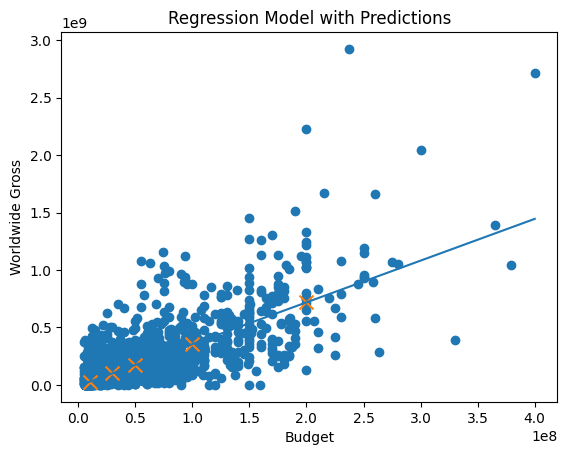

In [71]:
# Regression line
x_line = np.linspace(X.min(), X.max(), 300)
y_line = m * x_line + b

plt.figure()
plt.scatter(X, y)
plt.plot(x_line, y_line)
plt.scatter(test_budgets, predicted_gross, marker='x', s=100)
plt.xlabel("Budget")
plt.ylabel("Worldwide Gross")
plt.title("Regression Model with Predictions")
plt.show()


# Question 2: Do movies released in summer perform better financially than those in winter?

In [72]:
df['Release Date'] = pd.to_datetime(df['Release Date'], format='mixed', errors='coerce')
df['Month'] = df['Release Date'].dt.month

In [73]:
df['Worldwide Gross'] = (
    df['Worldwide Gross']
    .replace(r'[$,]', '', regex=True)
    .astype(float)
)

In [74]:
summer = df[df['Month'].isin([6, 7, 8])]['Worldwide Gross']
winter = df[df['Month'].isin([12, 1, 2])]['Worldwide Gross']

In [75]:
t_stat, p_value = ttest_ind(summer, winter, nan_policy='omit')

summer.mean(), winter.mean(), p_value

(np.float64(203036153.99025342),
 np.float64(163417571.3318584),
 np.float64(0.015306057536158572))

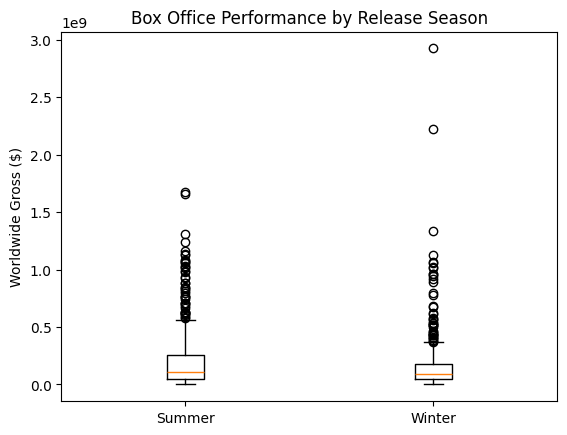

In [76]:
plt.boxplot([summer, winter], tick_labels=['Summer', 'Winter'])
plt.ylabel("Worldwide Gross ($)")
plt.title("Box Office Performance by Release Season")
plt.show()

In [77]:
print(f"Summer mean gross  ≈ ${summer.mean():,.0f}")
print(f"Winter mean gross  ≈ ${winter.mean():,.0f}")
print(f"p-value            ≈ {p_value:.5f}")

Summer mean gross  ≈ $203,036,154
Winter mean gross  ≈ $163,417,571
p-value            ≈ 0.01531


## Question 3:Is there a significant difference between critics’ and audience ratings across genres?


In [78]:
from scipy.stats import ttest_rel
df_merged = df.dropna(subset=['Critic_Score', 'Audience_Score'])

t, p_value = ttest_rel(df_merged['Critic_Score'], df_merged['Audience_Score'])

print(f"P-Value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference between Critic and Audience Scores.")
else:
    print("Conclusion: No significant difference found.")

P-Value: 1.012014736677661e-53
There is a significant difference between Critic and Audience Scores.


# Machine Learning Part (Extra)
## logistic regression 

#### general equation 

![alt text](0_QGl7lAEq2HKc6gAb.png)

#### sigmoid function

![alt text](1694183259537.png)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#PREPARE DATA FOR LOGISTIC REGRESSION
#convert Worldwide Gross to binary: 1 = high-grossing, 0 = low-grossing
threshold = df['Worldwide Gross'].median()
df['High_Gross'] = (df['Worldwide Gross'] > threshold).astype(int)

features = ['Budget', 'Rating', 'Vote Count', 'Critic_Score', 'Audience_Score']
ml_df = df[features + ['High_Gross']].dropna()

X = ml_df[features]
y = ml_df['High_Gross']







In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# LOGISTIC REGRESSION MODEL
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

![alt text](Confusion-matrix-with-the-formulas-of-precision-recall-accuracy-and-f1-score.jpg)

In [ ]:
# EVALUATION
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))





Accuracy: 0.8095238095238095

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       203
           1       0.84      0.76      0.80       196

    accuracy                           0.81       399
   macro avg       0.81      0.81      0.81       399
weighted avg       0.81      0.81      0.81       399



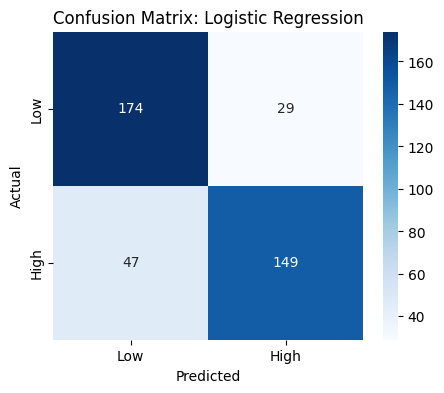

In [87]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

In [88]:
# Feature importance
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': log_model.coef_[0]})
print("\nFeature coefficients:\n", coef_df)


Feature coefficients:
           Feature   Coefficient
0          Budget  2.829417e-08
1          Rating -6.966904e-03
2      Vote Count  3.902466e-04
3    Critic_Score  4.252905e-03
4  Audience_Score -4.029691e-02
